# Covariance

In [6]:
import numpy as np
np.random.seed(0)
x = np.random.normal(loc=5,scale =1, size=200)
y = 10*x+np.random.normal(size=200)

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ,
       5.14404357, 6.45427351, 5.76103773, 5.12167502, 5.44386323,
       5.33367433, 6.49407907, 4.79484174, 5.3130677 , 4.14590426,
       2.44701018, 5.6536186 , 5.8644362 , 4.25783498, 7.26975462,
       3.54563433, 5.04575852, 4.81281615, 6.53277921, 6.46935877,
       5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725,
       3.95144703, 3.57998206, 3.29372981, 6.9507754 , 4.49034782,
       4.5619257 , 3.74720464, 5.77749036, 3.38610215, 4.78725972,
       4.10453344, 5.3869025 , 4.48919486, 3.81936782, 4.97181777,
       5.42833187, 5.06651722, 5.3024719 , 4.36567791, 4.63725883,
       4.32753955, 4.64044684, 4.18685372, 3.2737174 , 5.17742614,
       4.59821906, 3.36980165, 5.46278226, 4.09270164, 5.0519454 ,
       5.72909056, 5.12898291, 6.13940068, 3.76517418, 5.40234

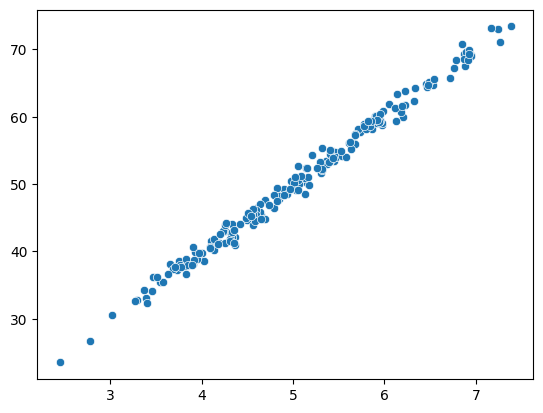

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=x,y=y)
plt.show()

In [7]:
matrix = np.cov(x,y)
matrix

array([[  1.04854721,  10.55868724],
       [ 10.55868724, 107.21323085]])

In [10]:
np.var(x),np.var(y)

(1.0433044724105929, 106.67716469984062)

In [ ]:
matrix[0,1] # +ve bath rise and fall together 

# Visualization

<Axes: >

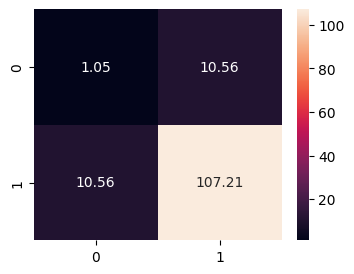

In [16]:
plt.figure(figsize=(4,3))
sns.heatmap(matrix,annot=True,fmt='.2f')

<Axes: >

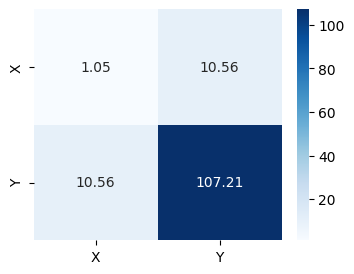

In [15]:
import pandas as pd
df= pd.DataFrame(matrix,columns=['X','Y'],index = ['X','Y'])
plt.figure(figsize=(4,3))
sns.heatmap(df,annot=True,fmt='.2f',cmap="Blues")